In [1]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# Loading all the dataset
confirmed_cases=pd.read_csv("./static/output/df_confirmed.csv")

In [3]:
# Display the head of the dataset
confirmed_cases.head()

,Unnamed: 0,state_name,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,state
0,0,Washington,US,47.4009,-121.4905,0,0,0,0,0,...,572,643,904,1076,1014,1376,1524,1793,1996,WA
1,1,New York,US,42.1657,-74.9481,0,0,0,0,0,...,525,732,967,1706,2495,5365,8310,11710,15793,NY
2,2,California,US,36.1162,-119.6816,0,0,0,0,0,...,340,426,557,698,751,952,1177,1364,1642,CA
3,3,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,...,138,164,197,218,218,328,413,525,646,MA
4,4,Georgia,US,33.0406,-83.6431,0,0,0,0,0,...,66,99,121,146,199,287,420,507,600,GA


In [4]:
# Extracting all the columns using the .heys() function
cols = confirmed_cases.keys()
cols

Index(['Unnamed: 0', 'state_name', 'Country/Region', 'Lat', 'Long', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', 'state'],
      dtype='object')

In [5]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases
confirmed = confirmed_cases.loc[:,cols[5]:cols[-2]]

In [6]:
# check the head of the outbreak cases
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,0,0,0,0,0,0,0,0,0,0,...,568,572,643,904,1076,1014,1376,1524,1793,1996
1,0,0,0,0,0,0,0,0,0,0,...,421,525,732,967,1706,2495,5365,8310,11710,15793
2,0,0,0,0,0,0,0,0,0,0,...,282,340,426,557,698,751,952,1177,1364,1642
3,0,0,0,0,0,0,0,0,0,0,...,123,138,164,197,218,218,328,413,525,646
4,0,0,0,0,0,0,0,0,0,0,...,42,66,99,121,146,199,287,420,507,600


In [52]:
total=confirmed.sum(axis=0)
total

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
3/18/20     7703
3/19/20    13588
3/20/20    18997
3/21/20    25378
3/22/20    33140
Length: 61, dtype: int64

In [57]:
change=total.pct_change()

In [58]:
total_df=total.to_frame()
change=change.to_list()
total_df=total_df.reset_index()

In [60]:
total_df=total_df.rename(columns={"index":"date",0: "confirmed"})
total_df["pct_change"]=change
total_df

,date,confirmed,pct_change
0,1/22/20,0,NaN
1,1/23/20,0,NaN
2,1/24/20,0,NaN
3,1/25/20,0,NaN
4,1/26/20,0,NaN
...,...,...,...
56,3/18/20,7703,0.214410
57,3/19/20,13588,0.763988
58,3/20/20,18997,0.398072
59,3/21/20,25378,0.335895


In [61]:
total_0_df=total_df.loc[total_df['confirmed'] != 0]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

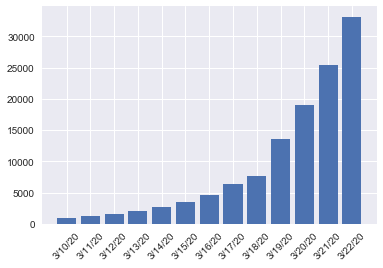

In [63]:
plt.bar(total_0_df["date"],total_0_df["confirmed"])
degrees = 45
plt.xticks(rotation=degrees)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

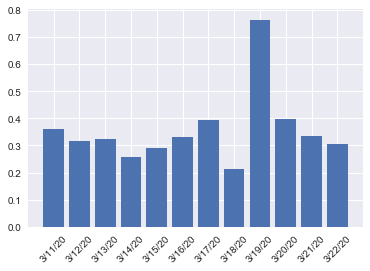

In [64]:
plt.bar(total_0_df["date"],total_0_df["pct_change"])
degrees = 45
plt.xticks(rotation=degrees)

In [7]:
# Finding the total confirmed cases, death cases and the recovered cases and append the to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases
dates = confirmed.keys()
world_cases= []
total_deaths= []
mortality_rate= []
total_recovered= []

for i in dates:
    confirmed_sum=confirmed[i].sum()
#     death_sum = deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
#     total_deaths.append(death_sum)
#     mortality_rate.append(death_sum/confirmed_sum)
#     total_recovered.append(recovered_sum)

In [8]:
# Display each of the newly created variables
confirmed_sum

33140

In [9]:
# death_sum
# recovered_sum
# world_cases

In [10]:
# Convert all the dates and the cases in the form of a numpy array
days_since_1_22 =np.array([i for i in range(len(dates))]).reshape(-1,1)
# world_cases = np.array(world_cases).reshape(-1,1)
# total_deaths = np.array(total_deaths).reshape(-1,1)
# total_recovered = np.array(total_recovered).reshape(-1,1)

In [11]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

In [12]:
# world_cases
# total_deaths
# total_recovered

In [13]:
# Future forecasting for the next 10 days
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [14]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70]])

In [15]:
# Convert all the integers into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append(((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y')))

In [16]:
# For visualization with the lates data of 22 of march
latest_confirmed = confirmed_cases[dates[-1]]
# latest_deaths = deaths_reported[dates[-1]]
# latest_recoveries = recovered_reported[dates[-1]]

In [17]:
latest_confirmed

0      1996
1     15793
2      1642
3       646
4       600
5       476
6       830
7      1914
8       161
9       627
10     1049
11      509
12       90
13      244
14      302
15      196
16      505
17      221
18      152
19      201
20       99
21      102
22      190
23       65
24      169
25       51
26      355
27       83
28      381
29      223
30       48
31       67
32      181
33       64
34      837
35      100
36       52
37       21
38      165
39       47
40       42
41       89
42     1037
43      207
44       31
45       57
46       28
47       21
48       12
49       24
50      138
Name: 3/22/20, dtype: int64

In [18]:
# latest_deaths
# latest_recoveries

In [19]:
# Find the list of unique states
unique_states = list(confirmed_cases['state_name'].unique())
unique_states

['Washington',
 'New York',
 'California',
 'Massachusetts',
 'Georgia',
 'Colorado',
 'Florida',
 'New Jersey',
 'Oregon',
 'Texas',
 'Illinois',
 'Pennsylvania',
 'Iowa',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Tennessee',
 'Virginia',
 'Arizona',
 'Indiana',
 'Kentucky',
 'District of Columbia',
 'Nevada',
 'New Hampshire',
 'Minnesota',
 'Nebraska',
 'Ohio',
 'Rhode Island',
 'Wisconsin',
 'Connecticut',
 'Hawaii',
 'Oklahoma',
 'Utah',
 'Kansas',
 'Louisiana',
 'Missouri',
 'Vermont',
 'Alaska',
 'Arkansas',
 'Delaware',
 'Idaho',
 'Maine',
 'Michigan',
 'Mississippi',
 'Montana',
 'New Mexico',
 'North Dakota',
 'South Dakota',
 'West Virginia',
 'Wyoming',
 'Alabama']

In [20]:
# The next line of code will basically calculate the total number of confirmed cases by each state
state_confirmed_cases = []
no_cases = []
for i in unique_states:
    cases = latest_confirmed[confirmed_cases['state_name']==i].sum()
    if cases > 0:
        state_confirmed_cases.append(cases)
    else: 
        no_cases.append(i)
for i in no_cases:
    unique_states.remove(i)
unique_states = [k for k,v in sorted(zip(unique_states,state_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_states)):
    state_confirmed_cases[i] = latest_confirmed[confirmed_cases['state_name']==unique_states[i]].sum()

In [21]:
# number of cases per state
print('Confirmed Cases by States:')
for i in range(len(unique_states)):
    print(f'{unique_states[i]}:{state_confirmed_cases[i]} cases')

Confirmed Cases by States:
New York:15793 cases
Washington:1996 cases
New Jersey:1914 cases
California:1642 cases
Illinois:1049 cases
Michigan:1037 cases
Louisiana:837 cases
Florida:830 cases
Massachusetts:646 cases
Texas:627 cases
Georgia:600 cases
Pennsylvania:509 cases
Tennessee:505 cases
Colorado:476 cases
Wisconsin:381 cases
Ohio:355 cases
North Carolina:302 cases
Maryland:244 cases
Connecticut:223 cases
Virginia:221 cases
Mississippi:207 cases
Indiana:201 cases
South Carolina:196 cases
Nevada:190 cases
Utah:181 cases
Minnesota:169 cases
Arkansas:165 cases
Oregon:161 cases
Arizona:152 cases
Alabama:138 cases
District of Columbia:102 cases
Missouri:100 cases
Kentucky:99 cases
Iowa:90 cases
Maine:89 cases
Rhode Island:83 cases
Oklahoma:67 cases
New Hampshire:65 cases
Kansas:64 cases
New Mexico:57 cases
Vermont:52 cases
Nebraska:51 cases
Hawaii:48 cases
Delaware:47 cases
Idaho:42 cases
Montana:31 cases
North Dakota:28 cases
Wyoming:24 cases
Alaska:21 cases
South Dakota:21 cases
West 

In [22]:
# handling nan values if there is any
nan_indices = []
for i in range(len(unique_states)):
    if type(unique_states[i])== float:
        nan_indices.append(i)
unique_states = list(unique_states)
state_confirmed_cases = list(state_confirmed_cases)

for i in nan_indices:
    unique_states.pop(i)
    state_confirmed_cases.pop(i)

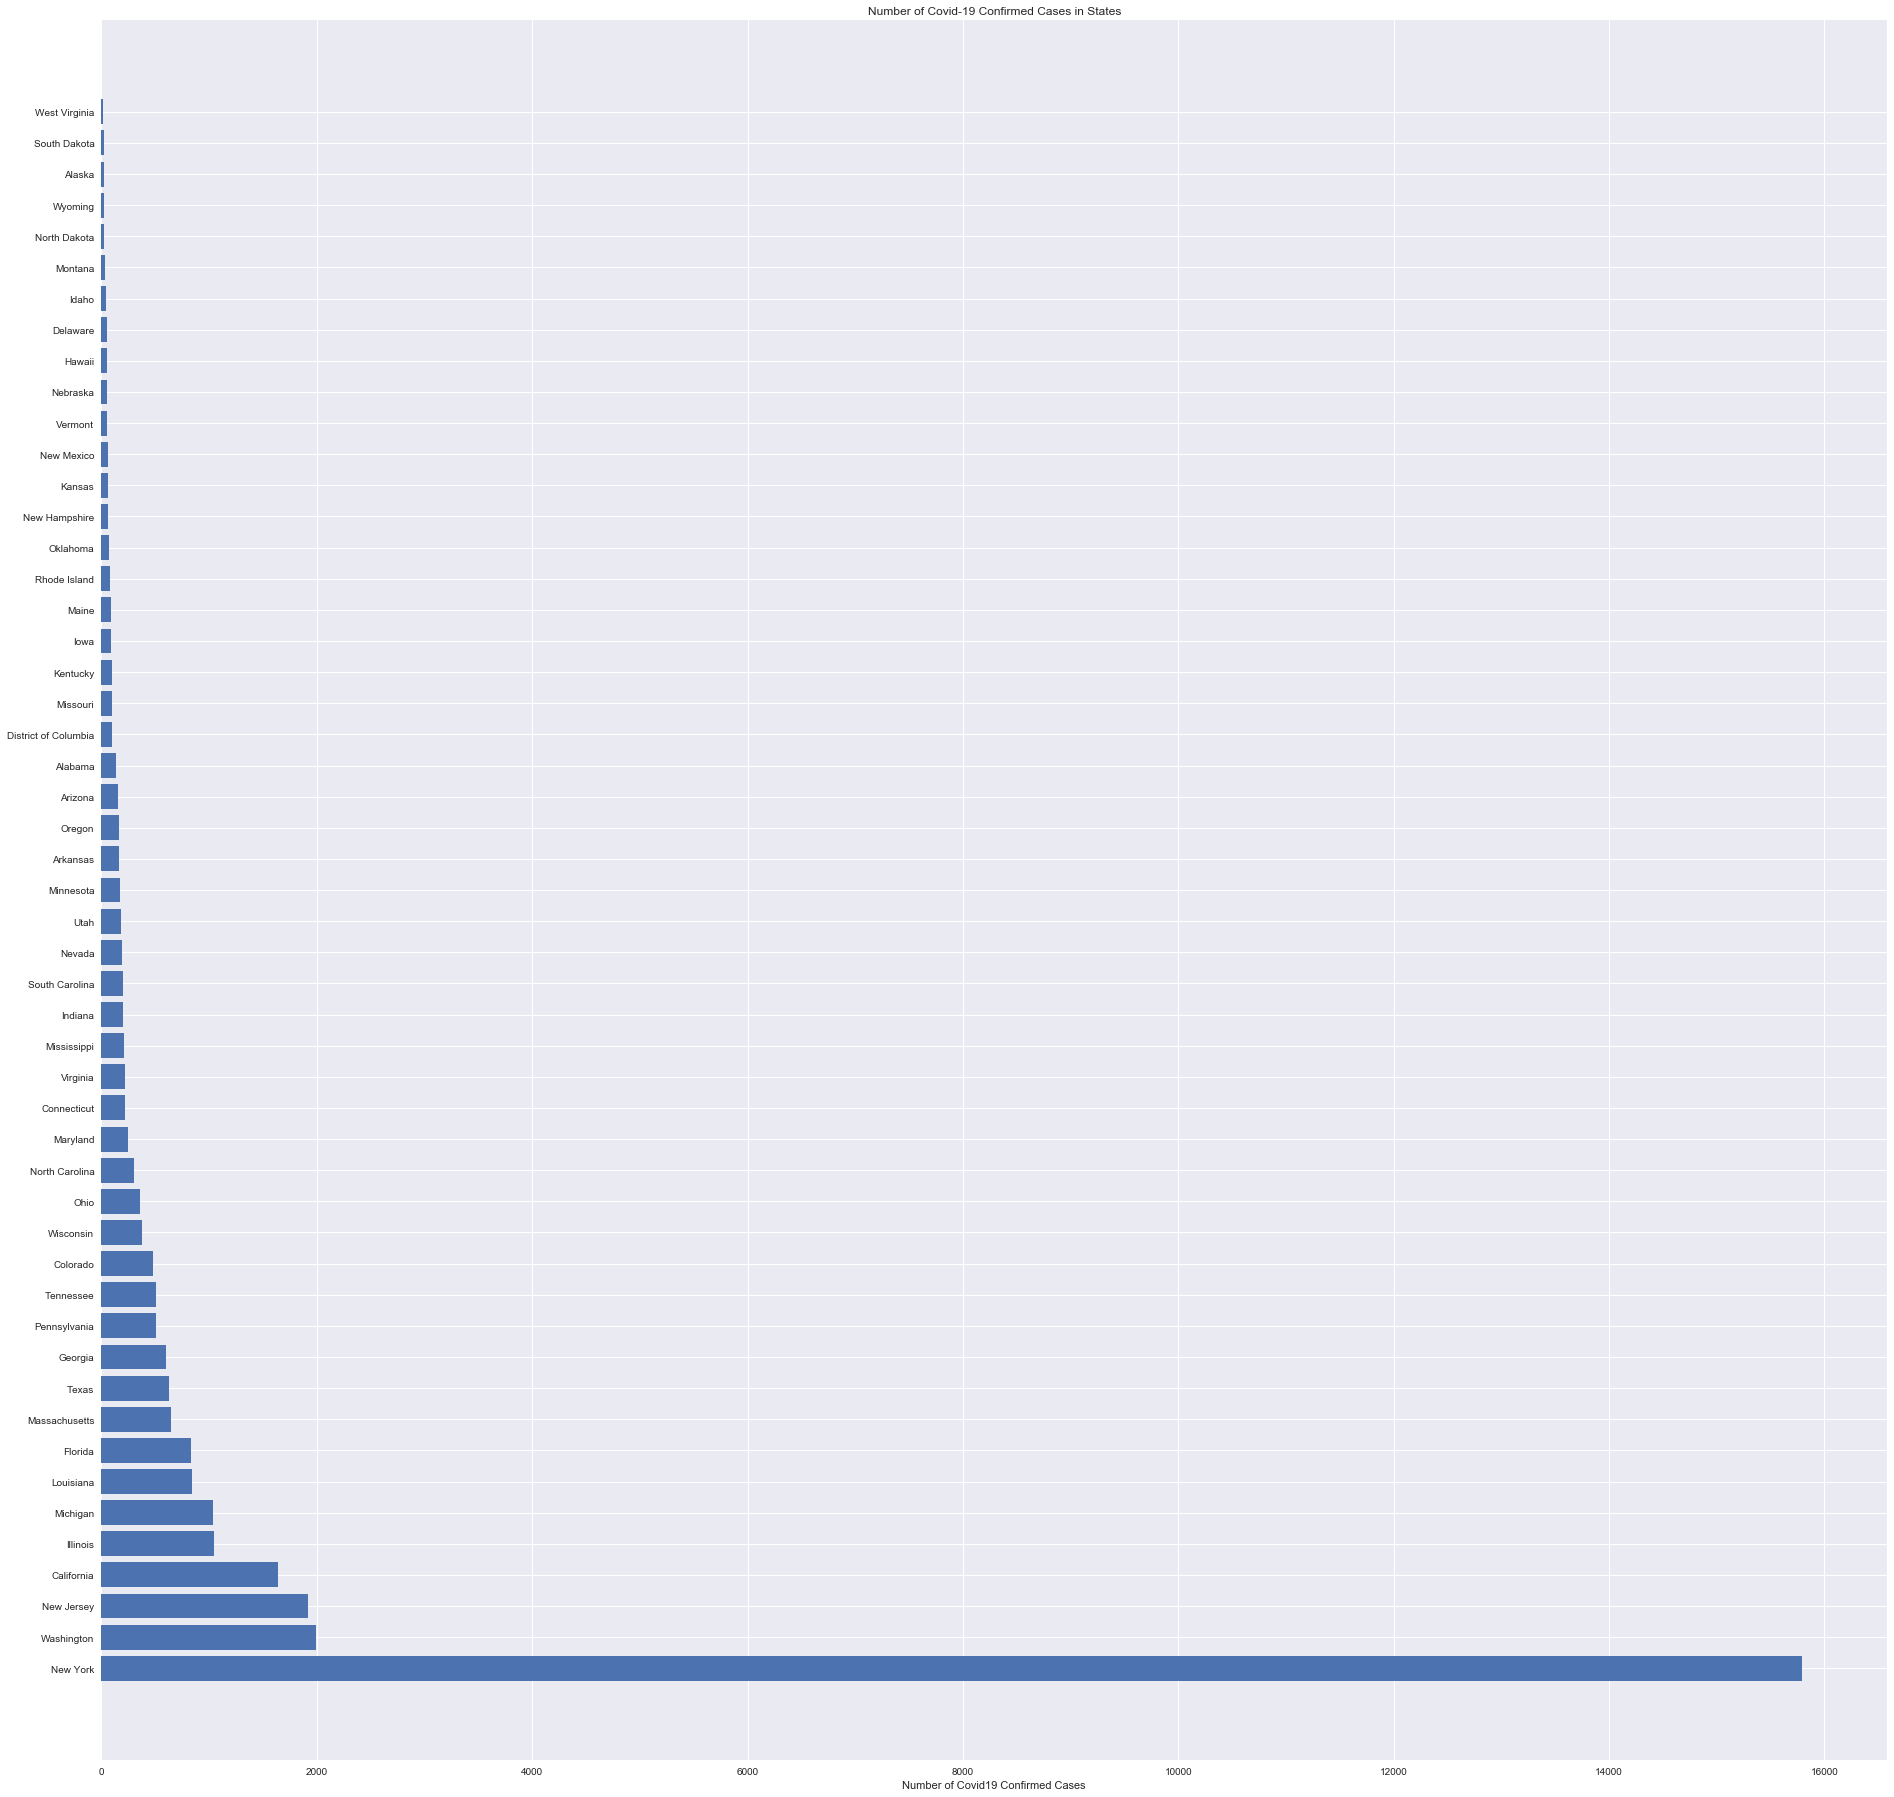

In [23]:
# Plot a bar graph to see the total confirmed cases across different countries
plt.figure(figsize = (32,32))
plt.barh(unique_states,state_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in States')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [24]:
# Only show 10 States with the most confirmed cases, the rest are grouped into the category named others
visual_unique_states = []
visual_confirmed_cases = []
others = np.sum(state_confirmed_cases[10:])
for i in range(len(state_confirmed_cases[:10])):
    visual_unique_states.append(unique_states[i])
    visual_confirmed_cases.append(state_confirmed_cases[i])
visual_unique_states.append('Others')
visual_confirmed_cases.append(others)

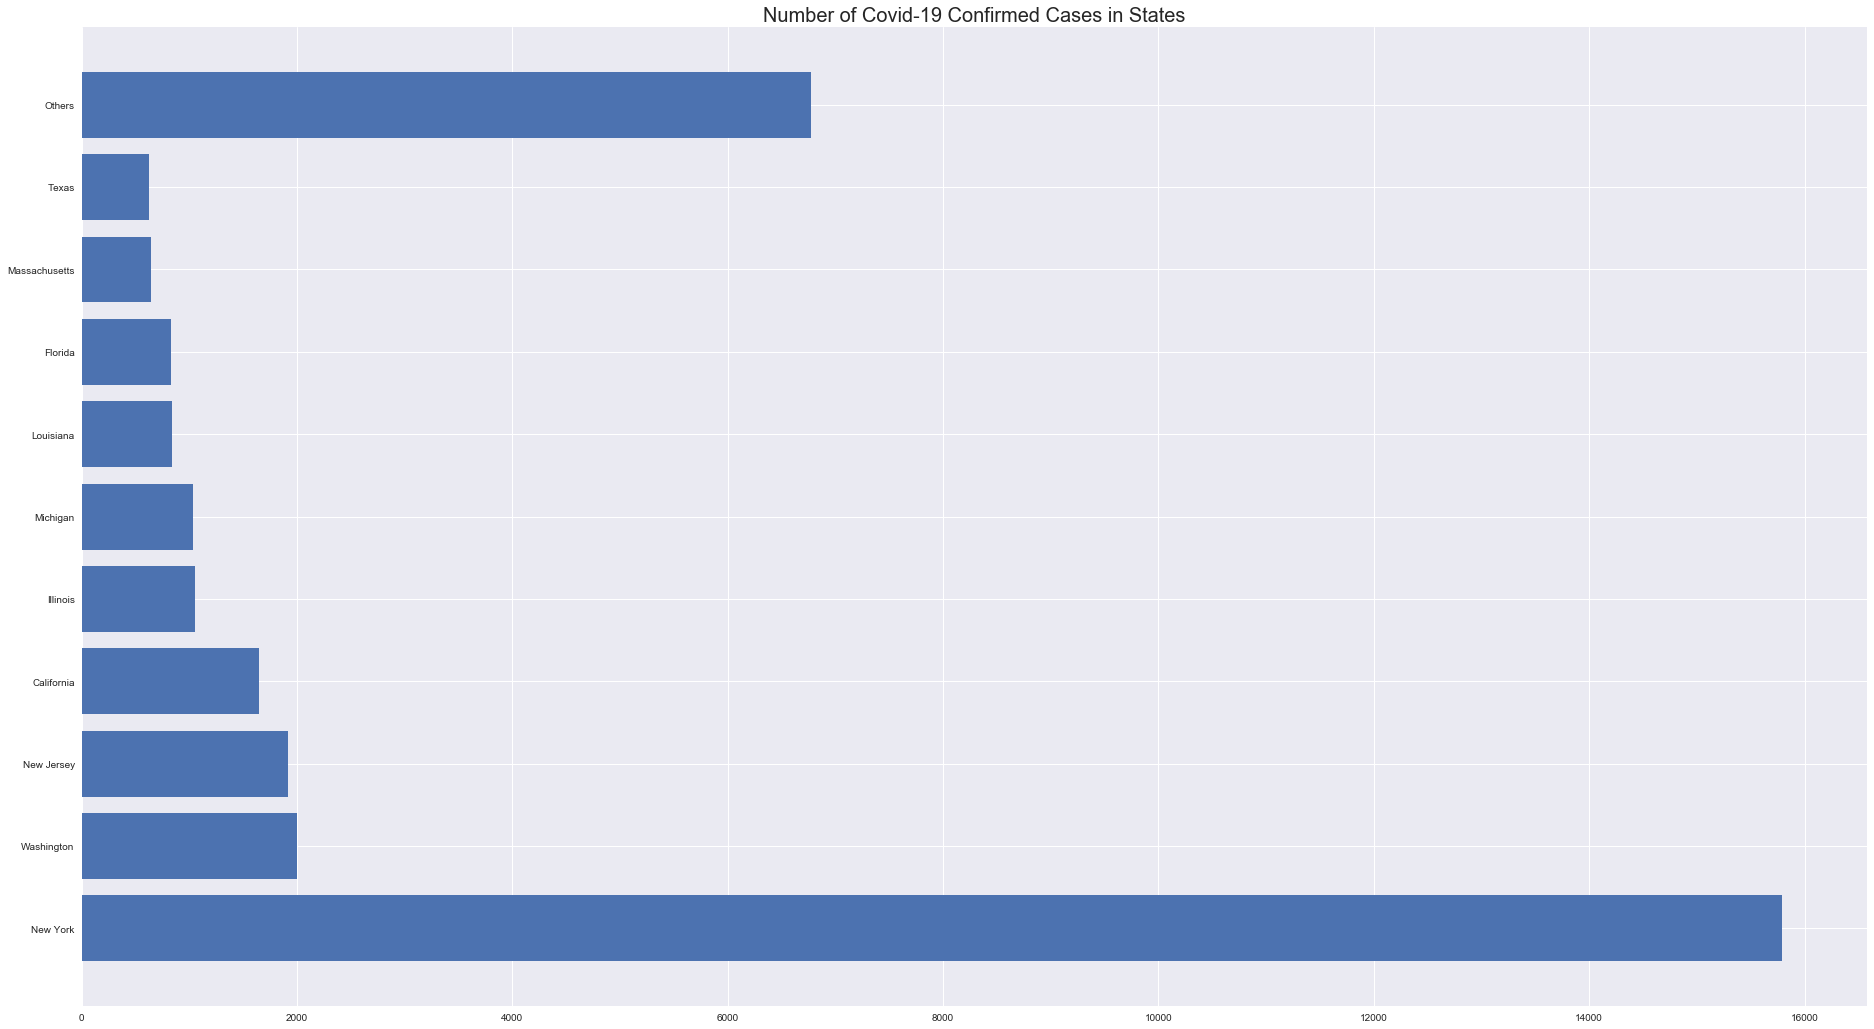

In [25]:
# Visualize the 10 states
plt.figure(figsize =(32,18))
plt.barh(visual_unique_states,visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in States',size=20)
plt.show()

In [27]:
y = confirmed["3/22/20"]
X = confirmed.drop("3/22/20",axis=1)
x_train_confirmed, x_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X,y, random_state=42)

In [28]:
# Building the SVM model
kernel= ['poly','sigmoid','rbf']
c = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking = [True, False]
svm_grid = {'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm,svm_grid,scoring = 'neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)

svm_search.fit(x_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   39.0s finished
C:\Users\hxl08\.conda\envs\PythonData\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
svm_search.best_params_

In [ ]:
X.shape

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(x_test_confirmed)

In [ ]:
svm_confirmed

In [ ]:
svm_pred